# Machine Learning in Julia (conclusion)

An introduction to the
[MLJ](https://alan-turing-institute.github.io/MLJ.jl/stable/)
toolbox.

### Set-up

Inspect Julia version:

In [1]:
VERSION

v"1.6.3"

The following instantiates a package environment.

The package environment has been created using **Julia 1.6** and may not
instantiate properly for other Julia versions.

In [2]:
using Pkg
Pkg.activate("env")
Pkg.instantiate()

  Activating environment at `~/GoogleDrive/Julia/MLJ/MLJTutorial/notebooks/99_solution_to_exercises/env/Project.toml`


## General resources

- [MLJ Cheatsheet](https://alan-turing-institute.github.io/MLJ.jl/dev/mlj_cheatsheet/)
- [Common MLJ Workflows](https://alan-turing-institute.github.io/MLJ.jl/dev/common_mlj_workflows/)
- [MLJ manual](https://alan-turing-institute.github.io/MLJ.jl/dev/)
- [Data Science Tutorials in Julia](https://juliaai.github.io/DataScienceTutorials.jl/)

## Solutions to exercises

In [3]:
using MLJ, UrlDownload, CSV, DataFrames, Plots

#### Exercise 2 solution

From the question statememt:

In [4]:
quality = ["good", "poor", "poor", "excellent", missing, "good", "excellent"]

7-element Vector{Union{Missing, String}}:
 "good"
 "poor"
 "poor"
 "excellent"
 missing
 "good"
 "excellent"

In [5]:
quality = coerce(quality, OrderedFactor);
levels!(quality, ["poor", "good", "excellent"]);
elscitype(quality)

┌ Info: Trying to coerce from `Union{Missing, String}` to `OrderedFactor`.
│ Coerced to `Union{Missing,OrderedFactor}` instead.
└ @ ScientificTypes /Users/anthony/.julia/packages/ScientificTypes/Vswzn/src/convention/coerce.jl:174


Union{Missing, OrderedFactor{3}}

#### Exercise 3 solution

From the question statement:

In [6]:
house_csv = urldownload("https://raw.githubusercontent.com/ablaom/"*
                        "MachineLearningInJulia2020/for-MLJ-version-0.16/"*
                        "data/house.csv");
house = DataFrames.DataFrame(house_csv)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
,Float64,Int64,Float64,Int64,Int64,Float64,Int64,Int64
1,221900.0,3,1.0,1180,5650,1.0,0,0
2,538000.0,3,2.25,2570,7242,2.0,0,0
3,180000.0,2,1.0,770,10000,1.0,0,0
4,604000.0,4,3.0,1960,5000,1.0,0,0
5,510000.0,3,2.0,1680,8080,1.0,0,0
6,1.225e6,4,4.5,5420,101930,1.0,0,0
7,257500.0,3,2.25,1715,6819,2.0,0,0
8,291850.0,3,1.5,1060,9711,1.0,0,0
9,229500.0,3,1.0,1780,7470,1.0,0,0


First pass:

In [7]:
coerce!(house, autotype(house));
schema(house)

┌───────────────┬───────────────────────────────────┬───────────────────┐
│ _.names       │ _.types                           │ _.scitypes        │
├───────────────┼───────────────────────────────────┼───────────────────┤
│ price         │ Float64                           │ Continuous        │
│ bedrooms      │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{13} │
│ bathrooms     │ CategoricalValue{Float64, UInt32} │ OrderedFactor{30} │
│ sqft_living   │ Int64                             │ Count             │
│ sqft_lot      │ Int64                             │ Count             │
│ floors        │ CategoricalValue{Float64, UInt32} │ OrderedFactor{6}  │
│ waterfront    │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{2}  │
│ view          │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{5}  │
│ condition     │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{5}  │
│ grade         │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{12} │
│ sqft_above    │ Int64               

All the "sqft" fields refer to "square feet" so are
really `Continuous`. We'll regard `:yr_built` (the other `Count`
variable above) as `Continuous` as well. So:

In [8]:
coerce!(house, Count => Continuous);

And `:zipcode` should not be ordered:

In [9]:
coerce!(house, :zipcode => Multiclass);
schema(house)

┌───────────────┬───────────────────────────────────┬───────────────────┐
│ _.names       │ _.types                           │ _.scitypes        │
├───────────────┼───────────────────────────────────┼───────────────────┤
│ price         │ Float64                           │ Continuous        │
│ bedrooms      │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{13} │
│ bathrooms     │ CategoricalValue{Float64, UInt32} │ OrderedFactor{30} │
│ sqft_living   │ Float64                           │ Continuous        │
│ sqft_lot      │ Float64                           │ Continuous        │
│ floors        │ CategoricalValue{Float64, UInt32} │ OrderedFactor{6}  │
│ waterfront    │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{2}  │
│ view          │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{5}  │
│ condition     │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{5}  │
│ grade         │ CategoricalValue{Int64, UInt32}   │ OrderedFactor{12} │
│ sqft_above    │ Float64             

`:bathrooms` looks like it has a lot of levels, but on further
inspection we see why, and `OrderedFactor` remains appropriate:

In [10]:
import StatsBase.countmap
countmap(house.bathrooms)

Dict{CategoricalArrays.CategoricalValue{Float64, UInt32}, Int64} with 30 entries:
  5.0  => 21
  5.25 => 13
  1.25 => 9
  8.0  => 2
  6.75 => 2
  1.0  => 3852
  5.5  => 10
  0.0  => 10
  6.0  => 6
  6.25 => 2
  4.75 => 23
  3.25 => 589
  3.0  => 753
  2.25 => 2047
  0.5  => 4
  7.5  => 1
  5.75 => 4
  1.5  => 1446
  3.75 => 155
  4.0  => 136
  4.25 => 79
  2.0  => 1930
  2.75 => 1185
  3.5  => 731
  6.5  => 2
  ⋮    => ⋮

#### Exercise 4 solution

From the question statement:

In [11]:
import Distributions
poisson = Distributions.Poisson

age = 18 .+ 60*rand(10);
salary = coerce(rand(["small", "big", "huge"], 10), OrderedFactor);
levels!(salary, ["small", "big", "huge"]);
small = salary[1]

X4 = DataFrames.DataFrame(age=age, salary=salary)

n_devices(salary) = salary > small ? rand(poisson(1.3)) : rand(poisson(2.9))
y4 = [n_devices(row.salary) for row in eachrow(X4)]

10-element Vector{Int64}:
 4
 6
 4
 5
 5
 2
 6
 1
 3
 5

4(a)

There are *no* models that apply immediately:

In [12]:
models(matching(X4, y4))

NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype), T} where T<:Tuple[]

4(b)

In [13]:
y4 = coerce(y4, Continuous);
models(matching(X4, y4))

6-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype), T} where T<:Tuple}:
 (name = ConstantRegressor, package_name = MLJModels, ... )
 (name = DecisionTreeRegressor, package_name = BetaML, ... )
 (name = DecisionTreeRegressor, package_name = DecisionTree, ... )
 (name = DeterministicConstantRegressor, package_name = MLJModels, ... )
 (name = RandomForestRegressor, package_name = BetaML, ... )
 (name = RandomForestRegressor, package_name = DecisionTree, ... )

#### Exercise 6 solution

From the question statement:

In [14]:
using UrlDownload, CSV
csv_file = urldownload("https://raw.githubusercontent.com/ablaom/"*
                   "MachineLearningInJulia2020/"*
                   "for-MLJ-version-0.16/data/horse.csv");
horse = DataFrames.DataFrame(csv_file); # convert to data frame
coerce!(horse, autotype(horse));
coerce!(horse, Count => Continuous);
coerce!(horse,
        :surgery               => Multiclass,
        :age                   => Multiclass,
        :mucous_membranes      => Multiclass,
        :capillary_refill_time => Multiclass,
        :outcome               => Multiclass,
        :cp_data               => Multiclass);
schema(horse)

┌─────────────────────────┬─────────────────────────────────┬───────────────────
│ _.names                 │ _.types                         │ _.scitypes       ⋯
├─────────────────────────┼─────────────────────────────────┼───────────────────
│ surgery                 │ CategoricalValue{Int64, UInt32} │ Multiclass{2}    ⋯
│ age                     │ CategoricalValue{Int64, UInt32} │ Multiclass{2}    ⋯
│ rectal_temperature      │ Float64                         │ Continuous       ⋯
│ pulse                   │ Float64                         │ Continuous       ⋯
│ respiratory_rate        │ Float64                         │ Continuous       ⋯
│ temperature_extremities │ CategoricalValue{Int64, UInt32} │ OrderedFactor{4} ⋯
│ mucous_membranes        │ CategoricalValue{Int64, UInt32} │ Multiclass{6}    ⋯
│ capillary_refill_time   │ CategoricalValue{Int64, UInt32} │ Multiclass{3}    ⋯
│ pain                    │ CategoricalValue{Int64, UInt32} │ OrderedFactor{5} ⋯
│ peristalsis             │ 

6(a)

In [15]:
y, X = unpack(horse,
              ==(:outcome),
              name -> elscitype(Tables.getcolumn(horse, name)) == Continuous);

6(b)(i)

In [16]:
train, test = partition(eachindex(y), 0.7)
model = (@load LogisticClassifier pkg=MLJLinearModels)();
model.lambda = 100
mach = machine(model, X, y)
fit!(mach, rows=train)
fitted_params(mach)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/anthony/.julia/packages/MLJModels/4sRmw/src/loading.jl:168


import MLJLinearModels ✔


┌ Info: Training Machine{LogisticClassifier,…}.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/machines.jl:403


(classes = CategoricalArrays.CategoricalValue{Int64, UInt32}[1, 2, 3],
 coefs = Pair{Symbol, SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}[:rectal_temperature => [0.06404489861119958, -0.054496936875540046, -0.009547961735659501], :pulse => [-0.006271354370414986, 0.0030195481537235087, 0.0032518062166935436], :respiratory_rate => [-0.006271354370414986, 0.0030195481537235087, 0.0032518062166935436], :packed_cell_volume => [-0.050661880364348426, 0.03574495338668303, 0.014916926977666974], :total_protein => [0.059973266693703765, -0.12804140372101466, 0.06806813702731153]],
 intercept = [3.37428722398718e-6, -3.37428699190205e-6, -3.3349798867560985],)

In [17]:
coefs_given_feature = Dict(fitted_params(mach).coefs)
coefs_given_feature[:pulse]

#6(b)(ii)

yhat = predict(mach, rows=test); # or predict(mach, X[test,:])
err = cross_entropy(yhat, y[test]) |> mean

0.8037782856338999

6(b)(iii)

The predicted probabilities of the actual observations in the test
are given by

In [18]:
p = broadcast(pdf, yhat, y[test]);

The number of times this probability exceeds 50% is:

In [19]:
n50 = filter(x -> x > 0.5, p) |> length

79

Or, as a proportion:

In [20]:
n50/length(test)

0.7181818181818181

6(b)(iv)

In [21]:
misclassification_rate(mode.(yhat), y[test])

0.2727272727272727

6(c)(i)

In [22]:
model = (@load RandomForestClassifier pkg=DecisionTree)()
mach = machine(model, X, y)
evaluate!(mach, resampling=CV(nfolds=6), measure=cross_entropy)

r = range(model, :n_trees, lower=10, upper=70, scale=:log10)

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/anthony/.julia/packages/MLJModels/4sRmw/src/loading.jl:168
Evaluating over 6 folds: 100%[=========================] Time: 0:00:02


NumericRange(10 ≤ n_trees ≤ 70; origin=40.0, unit=30.0) on log10 scale

Since random forests are inherently randomized, we generate multiple
curves:

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/machines.jl:403
┌ Info: Attempting to evaluate 29 models.
└ @ MLJTuning /Users/anthony/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 29 metamodels: 100%[=========================] Time: 0:00:02
┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/machines.jl:403
┌ Info: Attempting to evaluate 29 models.
└ @ MLJTuning /Users/anthony/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 29 metamodels: 100%[=========================] Time: 0:00:00
┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/machines.jl:403
┌ Info: Attempting to evaluate 29 models.
└ @ MLJTuning /Users/anthony/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 29 metamodels: 100%[===============

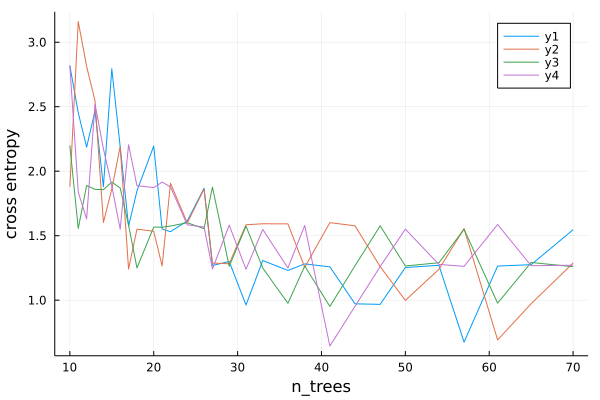

In [23]:
plt = plot()
for i in 1:4
    one_curve = learning_curve(mach,
                           range=r,
                           resampling=Holdout(),
                           measure=cross_entropy)
    plot!(one_curve.parameter_values, one_curve.measurements)
end
xlabel!(plt, "n_trees")
ylabel!(plt, "cross entropy")
savefig("exercise_6ci.png")
plt

6(c)(ii)

In [24]:
evaluate!(mach, resampling=CV(nfolds=9),
                measure=cross_entropy,
                rows=train).measurement[1]

model.n_trees = 90

┌ Info: Creating subsamples from a subset of all rows. 
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/resampling.jl:490
Evaluating over 9 folds: 100%[=========================] Time: 0:00:00


90

6(c)(iii)

In [25]:
err_forest = evaluate!(mach, resampling=Holdout(),
                       measure=cross_entropy).measurement[1]

0.9891019012564205

#### Exercise 7

(a)

In [26]:
KMeans = @load KMeans pkg=Clustering
EvoTreeClassifier = @load EvoTreeClassifier
pipe = @pipeline(Standardizer,
                 ContinuousEncoder,
                 KMeans(k=10),
                 EvoTreeClassifier(nrounds=50))

import MLJClusteringInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/anthony/.julia/packages/MLJModels/4sRmw/src/loading.jl:168


import EvoTrees ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/anthony/.julia/packages/MLJModels/4sRmw/src/loading.jl:168


Pipeline263(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    continuous_encoder = ContinuousEncoder(
            drop_last = false,
            one_hot_ordered_factors = false),
    k_means = KMeans(
            k = 10,
            metric = Distances.SqEuclidean(0.0)),
    evo_tree_classifier = EvoTreeClassifier(
            loss = EvoTrees.Softmax(),
            nrounds = 50,
            λ = 0.0,
            γ = 0.0,
            η = 0.1,
            max_depth = 5,
            min_weight = 1.0,
            rowsample = 1.0,
            colsample = 1.0,
            nbins = 64,
            α = 0.5,
            metric = :mlogloss,
            rng = MersenneTwister(123),
            device = "cpu"))

(b)

In [27]:
mach = machine(pipe, X, y)
evaluate!(mach, resampling=CV(nfolds=6), measure=cross_entropy)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:47


PerformanceEvaluation object with these fields:
  measure, measurement, operation, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_pairs
Extract:
┌────────────────────────────┬─────────────┬───────────┬────────────────────────
│ measure                    │ measurement │ operation │ per_fold              ⋯
├────────────────────────────┼─────────────┼───────────┼────────────────────────
│ LogLoss(tol = 2.22045e-16) │ 0.765       │ predict   │ [0.807, 0.884, 0.757, ⋯
└────────────────────────────┴─────────────┴───────────┴────────────────────────
                                                                1 column omitted


(c)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/machines.jl:403
┌ Info: Attempting to evaluate 10 models.
└ @ MLJTuning /Users/anthony/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:14


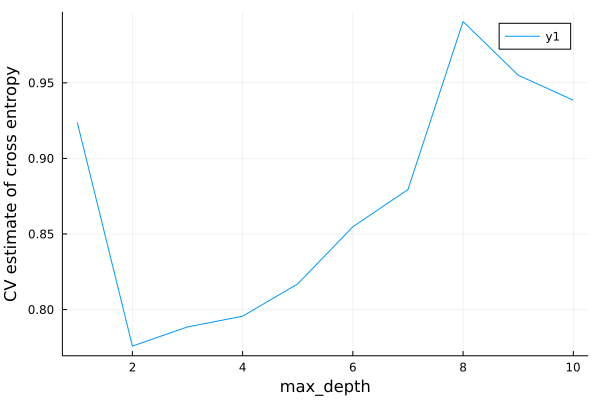

In [28]:
r = range(pipe, :(evo_tree_classifier.max_depth), lower=1, upper=10)

curve = learning_curve(mach,
                       range=r,
                       resampling=CV(nfolds=6),
                       measure=cross_entropy)

plt = plot(curve.parameter_values, curve.measurements)
xlabel!(plt, "max_depth")
ylabel!(plt, "CV estimate of cross entropy")
savefig("exercise_7c.png")
plt

Here's a second curve using a different random seed for the booster:

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/machines.jl:403
┌ Info: Attempting to evaluate 10 models.
└ @ MLJTuning /Users/anthony/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:13


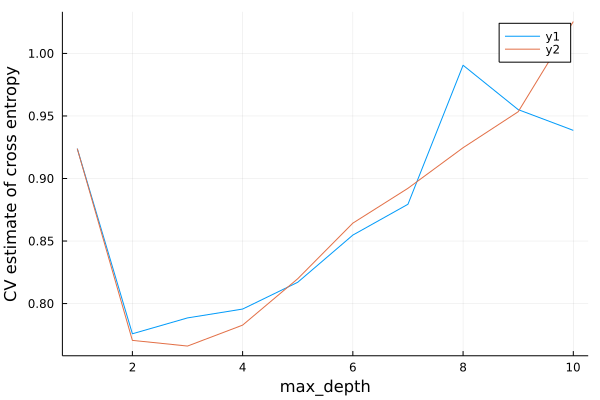

In [29]:
using Random
pipe.evo_tree_classifier.rng = MersenneTwister(123)
curve = learning_curve(mach,
                       range=r,
                       resampling=CV(nfolds=6),
                       measure=cross_entropy)
plot!(curve.parameter_values, curve.measurements)
savefig("exercise_7c_2.png")
plt

One can automate the production of multiple curves with different
seeds in the following way:

Evaluating Learning curve with 6 rngs: 100%[==================] Time: 0:01:19


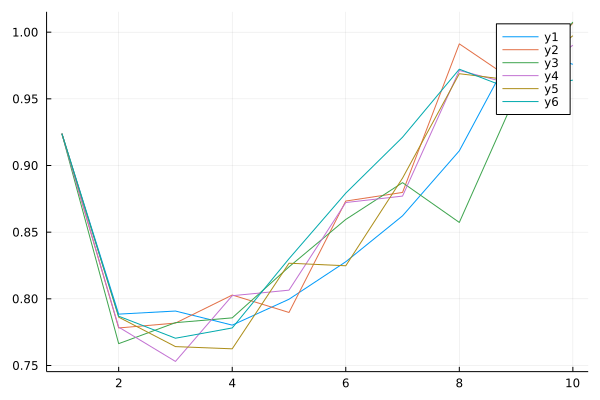

In [30]:
curves = learning_curve(mach,
                        range=r,
                        resampling=CV(nfolds=6),
                        measure=cross_entropy,
                        rng_name=:(evo_tree_classifier.rng),
                        rngs=6) # list of RNGs, or num to auto generate
plt = plot(curves.parameter_values, curves.measurements)
savefig("exercise_7c_3.png")
plt

If you have multiple threads available in your julia session, you
can add the option `acceleration=CPUThreads()` to speed up this
computation.

#### Exercise 8

From the question statement:

In [31]:
y, X = unpack(house, ==(:price), name -> true, rng=123); # from Exercise 3

EvoTreeRegressor = @load EvoTreeRegressor
tree_booster = EvoTreeRegressor(nrounds = 70)
model = @pipeline ContinuousEncoder tree_booster

r2 = range(model,
           :(evo_tree_regressor.nbins),
           lower = 2.5,
           upper= 7.5, scale=x->2^round(Int, x))

import EvoTrees ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/anthony/.julia/packages/MLJModels/4sRmw/src/loading.jl:168


transformed NumericRange(2.5 ≤ evo_tree_regressor.nbins ≤ 7.5; origin=5.0, unit=2.5)

(a)

In [32]:
r1 = range(model, :(evo_tree_regressor.max_depth), lower=1, upper=12)

NumericRange(1 ≤ evo_tree_regressor.max_depth ≤ 12; origin=6.5, unit=5.5)

(c)

┌ Info: Training Machine{DeterministicTunedModel{RandomSearch,…},…}.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/u6vLz/src/machines.jl:403
┌ Info: Attempting to evaluate 40 models.
└ @ MLJTuning /Users/anthony/.julia/packages/MLJTuning/bjRHJ/src/tuned_models.jl:680
Evaluating over 40 metamodels: 100%[=========================] Time: 0:02:51


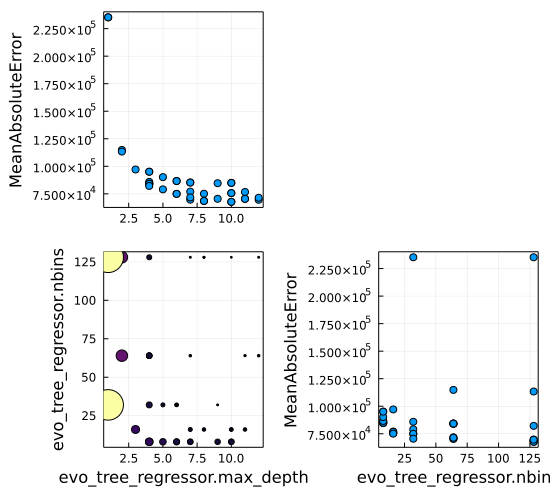

In [33]:
tuned_model = TunedModel(model=model,
                         ranges=[r1, r2],
                         resampling=Holdout(),
                         measures=mae,
                         tuning=RandomSearch(rng=123),
                         n=40)

tuned_mach = machine(tuned_model, X, y) |> fit!
plt = plot(tuned_mach)
savefig("exercise_8c.png")
plt

(d)

In [34]:
best_model = report(tuned_mach).best_model;
best_mach = machine(best_model, X, y);
best_err = evaluate!(best_mach, resampling=CV(nfolds=3), measure=mae)

Evaluating over 3 folds: 100%[=========================] Time: 0:00:41


PerformanceEvaluation object with these fields:
  measure, measurement, operation, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_pairs
Extract:
┌─────────────────────┬─────────────┬───────────┬─────────────────────────────┐
│ measure             │ measurement │ operation │ per_fold                    │
├─────────────────────┼─────────────┼───────────┼─────────────────────────────┤
│ MeanAbsoluteError() │ 68700.0     │ predict   │ [68800.0, 67800.0, 69500.0] │
└─────────────────────┴─────────────┴───────────┴─────────────────────────────┘


In [35]:
tuned_err = evaluate!(tuned_mach, resampling=CV(nfolds=3), measure=mae)

Evaluating over 3 folds: 100%[=========================] Time: 0:06:16


PerformanceEvaluation object with these fields:
  measure, measurement, operation, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_pairs
Extract:
┌─────────────────────┬─────────────┬───────────┬─────────────────────────────┐
│ measure             │ measurement │ operation │ per_fold                    │
├─────────────────────┼─────────────┼───────────┼─────────────────────────────┤
│ MeanAbsoluteError() │ 69900.0     │ predict   │ [71400.0, 67800.0, 70500.0] │
└─────────────────────┴─────────────┴───────────┴─────────────────────────────┘


---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*